In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv(r"/content/drive/MyDrive/3_total_with_clusters.csv")
df = df.drop('Unnamed: 0', axis=1)
df_groups = df.groupby('house_cluster')

Cluster 0

In [5]:
cluster0 = df_groups.get_group(5)
energy0 = cluster0.drop('house_cluster', axis=1)

In [6]:
housecount0 = cluster0.groupby('day')[['LCLid']].nunique()
# housecount0.get_group('2012-11-07')
housecount0.head()

,LCLid
day,
2011-11-23,1
2011-11-24,1
2011-11-25,1
2011-11-26,1
2011-11-27,1


<Axes: xlabel='day'>

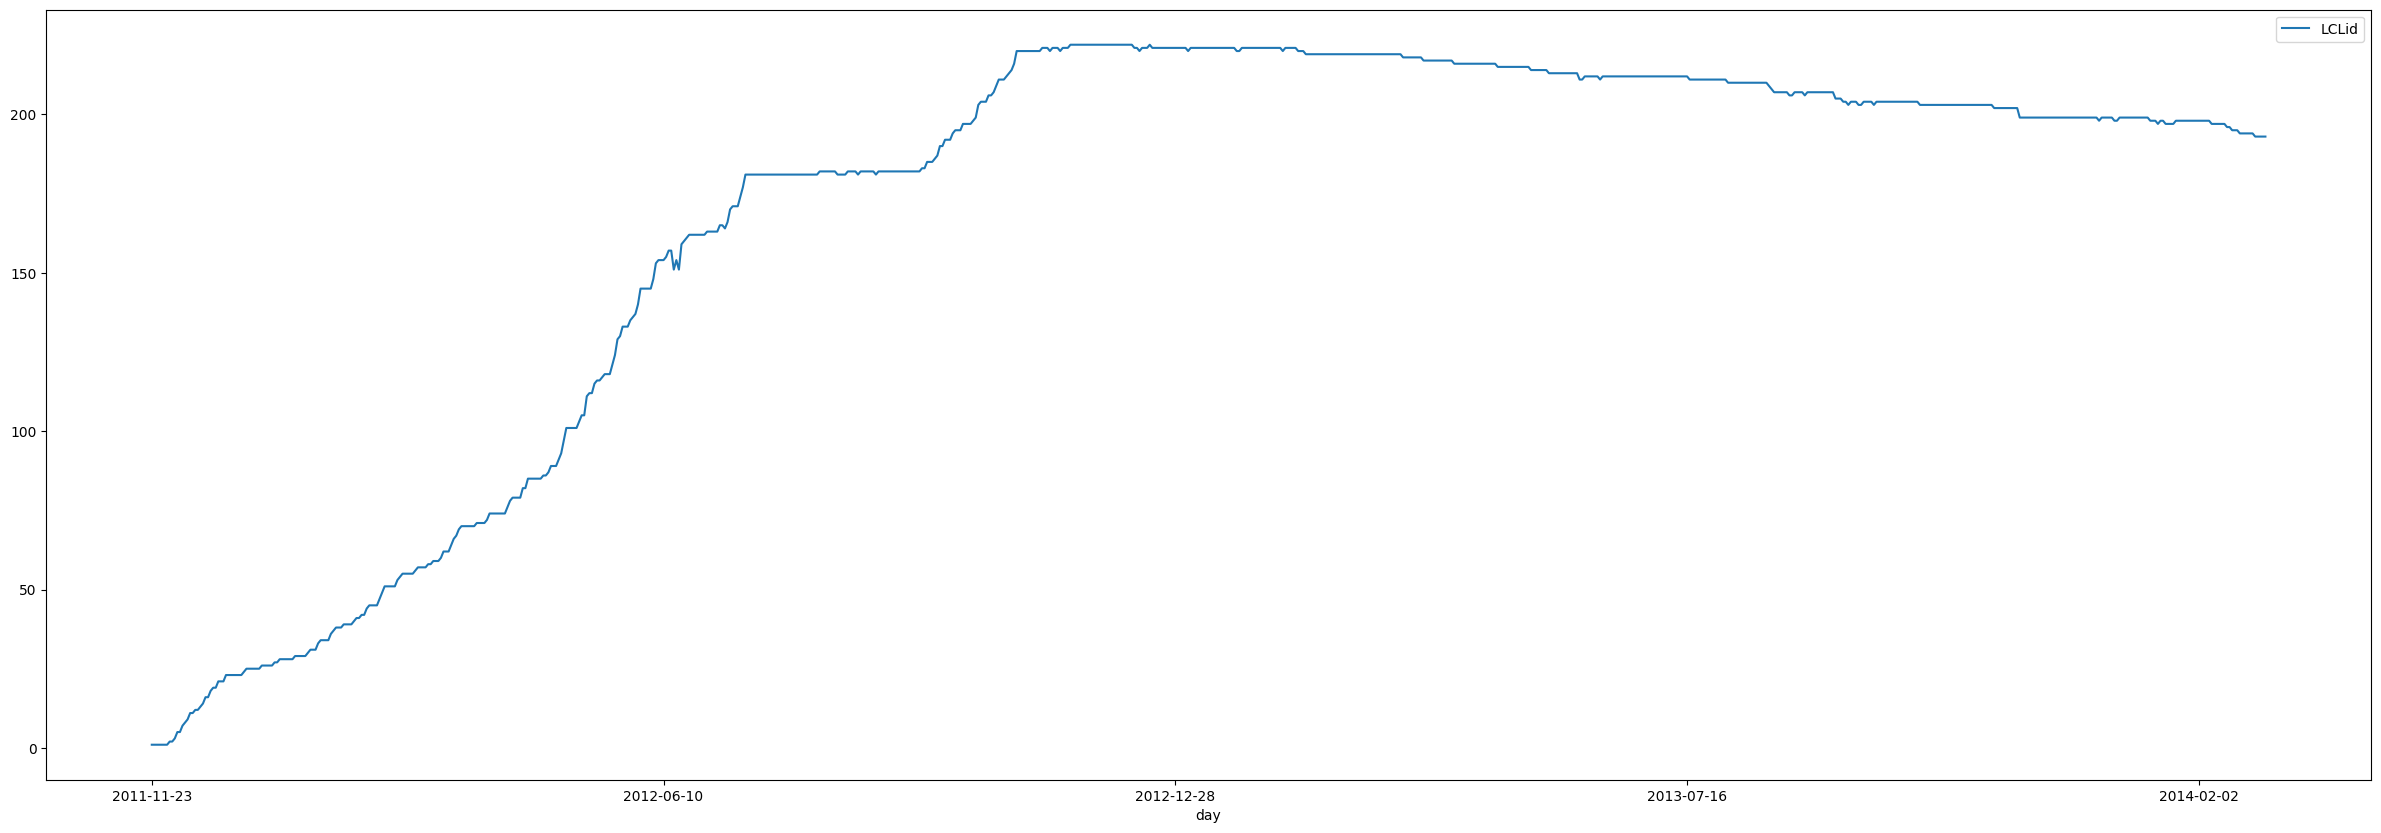

In [7]:
housecount0.plot(figsize=(30,10))

In [8]:
# [['LCLid', 'energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']]
energy0 = cluster0.groupby('day')[['energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']].sum()
energy0 = energy0.merge(housecount0, on=['day'])
energy0 = energy0.reset_index()
energy0.count()

day               827
energy_sum        827
temperatureMax    827
windSpeed         827
humidity          827
holiday_ind       827
LCLid             827
dtype: int64

In [9]:
energy0['day'] = pd.to_datetime(energy0['day'],format='%Y-%m-%d').dt.date

In [10]:
energy0['avg_energy'] =  energy0['energy_sum']/energy0['LCLid']
print("Starting Point of Data at Day Level",min(energy0['day']))
print("Ending Point of Data at Day Level",max(energy0['day']))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [11]:
energy0

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
0,2011-11-23,21.702000,10.36,2.04,0.93,0,1,21.702000
1,2011-11-24,29.722000,12.93,4.04,0.89,0,1,29.722000
2,2011-11-25,30.071000,13.03,5.02,0.79,0,1,30.071000
3,2011-11-26,33.384000,12.96,5.75,0.81,1,1,33.384000
4,2011-11-27,34.204000,13.54,5.48,0.72,1,1,34.204000
...,...,...,...,...,...,...,...,...
822,2014-02-24,7041.465001,2746.39,968.86,142.82,0,193,36.484275
823,2014-02-25,7124.631000,2205.99,1098.17,150.54,0,193,36.915187
824,2014-02-26,7151.227998,2178.97,737.26,140.89,0,193,37.052995
825,2014-02-27,7181.469000,1989.83,799.02,142.82,0,193,37.209684


In [12]:
energy0.describe()

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,5841.250879,2382.521318,608.817122,132.299033,48.187424,169.372430,34.209469
std,3047.620486,1480.604642,395.095675,55.396408,84.940443,66.298351,8.960250
min,21.702000,-13.260000,2.040000,0.720000,0.000000,1.000000,0.859420
25%,4000.661499,1229.280000,269.200000,111.175000,0.000000,158.000000,26.455088
50%,5602.950998,2274.800000,590.470000,148.500000,0.000000,199.000000,33.517926
75%,8403.818997,3446.445000,862.605000,171.720000,51.000000,214.000000,41.303170
max,18670.636002,6836.400000,1942.200000,287.760000,436.000000,222.000000,85.645119


In [13]:
# Weather clusters
from sklearn.preprocessing import MinMaxScaler

scaler0 = MinMaxScaler()
weather_scaled0 = scaler0.fit_transform(energy0[['temperatureMax','humidity','windSpeed']])

In [14]:
weather_scaled0

array([[3.44834634e-03, 7.31605351e-04, 0.00000000e+00],
       [3.82354745e-03, 5.92251951e-04, 1.03084282e-03],
       [3.83814671e-03, 2.43868450e-04, 1.53595580e-03],
       ...,
       [3.20049462e-01, 4.88329153e-01, 3.78948128e-01],
       [2.92436413e-01, 4.95052954e-01, 4.10780554e-01],
       [2.09033733e-01, 5.75738573e-01, 2.21775524e-01]])

[KMeans(n_clusters=1, n_init='auto'), KMeans(n_clusters=2, n_init='auto'), KMeans(n_clusters=3, n_init='auto'), KMeans(n_clusters=4, n_init='auto'), KMeans(n_clusters=5, n_init='auto'), KMeans(n_clusters=6, n_init='auto'), KMeans(n_clusters=7, n_init='auto'), KMeans(n_init='auto'), KMeans(n_clusters=9, n_init='auto'), KMeans(n_clusters=10, n_init='auto'), KMeans(n_clusters=11, n_init='auto'), KMeans(n_clusters=12, n_init='auto'), KMeans(n_clusters=13, n_init='auto'), KMeans(n_clusters=14, n_init='auto'), KMeans(n_clusters=15, n_init='auto'), KMeans(n_clusters=16, n_init='auto'), KMeans(n_clusters=17, n_init='auto'), KMeans(n_clusters=18, n_init='auto'), KMeans(n_clusters=19, n_init='auto')]
[-103.61300445040646, -52.629187770242936, -34.56830913638094, -24.7663798445095, -21.39129212156899, -18.501076027309157, -16.442794997763947, -14.756805716842837, -13.552578090630215, -12.801131683197475, -11.682981740588527, -11.07511475135586, -10.694655299284854, -10.067727628710898, -9.3421236

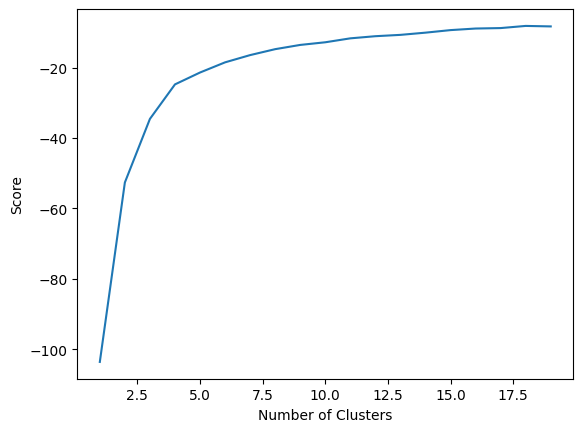

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Nc0 = range(1,20)
kmeans0 = [KMeans(n_clusters=i, n_init='auto') for i in Nc0]
print(kmeans0)

score0 = [kmeans0[i].fit(weather_scaled0).score(weather_scaled0) for i in range(len(kmeans0))]
print(score0)

plt.plot(Nc0, score0)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [16]:
kmeans0 = KMeans(n_clusters=3, max_iter=600, algorithm='lloyd', n_init='auto')
kmeans0.fit(weather_scaled0)
energy0['weather_cluster'] = kmeans0.labels_
energy0.head()

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy,weather_cluster
0,2011-11-23,21.702,10.36,2.04,0.93,0,1,21.702,1
1,2011-11-24,29.722,12.93,4.04,0.89,0,1,29.722,1
2,2011-11-25,30.071,13.03,5.02,0.79,0,1,30.071,1
3,2011-11-26,33.384,12.96,5.75,0.81,1,1,33.384,1
4,2011-11-27,34.204,13.54,5.48,0.72,1,1,34.204,1


In [17]:
# Model

In [18]:
import numpy as np

np.random.seed(11)
dataframe = energy0.loc[:,'avg_energy']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [19]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [20]:
reframed0 = series_to_supervised(dataset, 7,1)
reframed0.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,21.702000,29.722000,30.070999,33.383999,34.203999,40.709999,35.231998,26.559000
8,29.722000,30.070999,33.383999,34.203999,40.709999,35.231998,26.559000,27.070000
9,30.070999,33.383999,34.203999,40.709999,35.231998,26.559000,27.070000,23.627333
10,33.383999,34.203999,40.709999,35.231998,26.559000,27.070000,23.627333,26.904400
11,34.203999,40.709999,35.231998,26.559000,27.070000,23.627333,26.904400,36.511799


In [21]:
reframed0['weather_cluster'] = energy0['weather_cluster'].values[7:]
reframed0['holiday_ind']= energy0['holiday_ind'].values[7:]

In [22]:
reframed0 = reframed0.reindex(['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'], axis=1)
reframed0 = reframed0.values

In [23]:
n = int(0.2*(len(energy0)))
n

165

In [24]:
# Normalisation
scaler0 = MinMaxScaler(feature_range=(0, 1))
reframed0 = scaler0.fit_transform(reframed0)

In [25]:
train0 = reframed0[:(len(reframed0)-n), :]
test0 = reframed0[(len(reframed0)-n):len(reframed0), :]

In [26]:
train_X0, train_y0 = train0[:, :-1], train0[:, -1]
test_X0, test_y0 = test0[:, :-1], test0[:, -1]

In [27]:
train_X0 = train_X0.reshape((train_X0.shape[0], 1, train_X0.shape[1]))
test_X0 = test_X0.reshape((test_X0.shape[0], 1, test_X0.shape[1]))
print(train_X0.shape, train_y0.shape, test_X0.shape, test_y0.shape)

(655, 1, 9) (655,) (165, 1, 9) (165,)


In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import L2

In [29]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='rmsprop')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=50, batch_size=72, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()


In [30]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

Epoch 1/100
21/21 - 4s - loss: 0.1144 - val_loss: 0.0882 - 4s/epoch - 194ms/step
Epoch 2/100
21/21 - 0s - loss: 0.0322 - val_loss: 0.0078 - 73ms/epoch - 3ms/step
Epoch 3/100
21/21 - 0s - loss: 0.0053 - val_loss: 0.0032 - 72ms/epoch - 3ms/step
Epoch 4/100
21/21 - 0s - loss: 0.0032 - val_loss: 0.0028 - 84ms/epoch - 4ms/step
Epoch 5/100
21/21 - 0s - loss: 0.0023 - val_loss: 0.0022 - 83ms/epoch - 4ms/step
Epoch 6/100
21/21 - 0s - loss: 0.0022 - val_loss: 0.0021 - 76ms/epoch - 4ms/step
Epoch 7/100
21/21 - 0s - loss: 0.0023 - val_loss: 0.0020 - 93ms/epoch - 4ms/step
Epoch 8/100
21/21 - 0s - loss: 0.0022 - val_loss: 0.0021 - 98ms/epoch - 5ms/step
Epoch 9/100
21/21 - 0s - loss: 0.0021 - val_loss: 0.0019 - 80ms/epoch - 4ms/step
Epoch 10/100
21/21 - 0s - loss: 0.0020 - val_loss: 0.0020 - 73ms/epoch - 3ms/step
Epoch 11/100
21/21 - 0s - loss: 0.0021 - val_loss: 0.0019 - 93ms/epoch - 4ms/step
Epoch 12/100
21/21 - 0s - loss: 0.0020 - val_loss: 0.0019 - 96ms/epoch - 5ms/step
Epoch 13/100
21/21 - 0s -

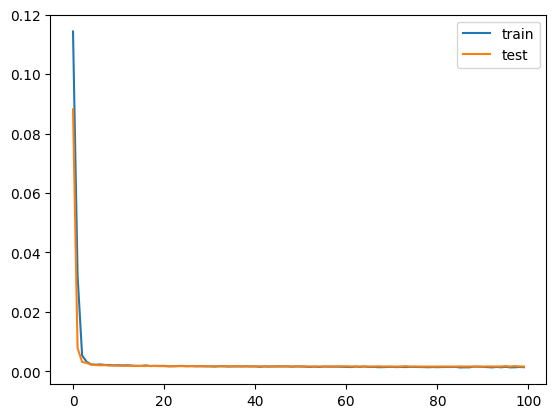

In [31]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

6/6 [==============================] - 1s 2ms/step
(165, 1) (165,)
(165,) (165,)
Test MAE: 0.020


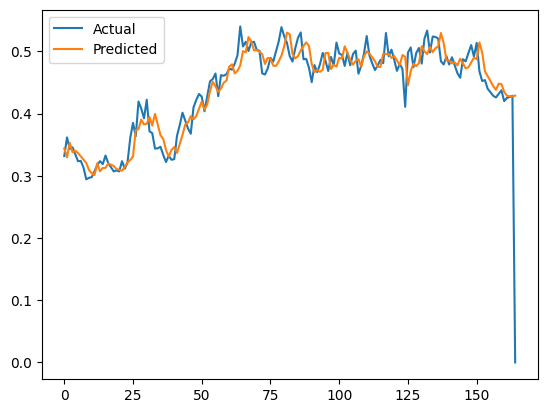

In [32]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [33]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.002
Test RMSE: 0.040


In [34]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.7289410611102973


Cross Validation

In [35]:
df_temp0 = pd.DataFrame(reframed0, columns = ['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'])
df_temp0['date'] = energy0['day']
df_temp0 = df_temp0[['date', 'weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)']]
df_temp0

,date,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,2011-11-23,0.5,0.000000,0.025961,0.148129,0.153446,0.203912,0.216403,0.315508,0.232062,0.303112
1,2011-11-24,0.5,0.000000,0.148129,0.153446,0.203912,0.216403,0.315508,0.232062,0.099948,0.309139
2,2011-11-25,0.5,0.000000,0.153446,0.203912,0.216403,0.315508,0.232062,0.099948,0.107732,0.268535
3,2011-11-26,0.5,0.011468,0.203912,0.216403,0.315508,0.232062,0.099948,0.107732,0.055290,0.307186
4,2011-11-27,0.5,0.011468,0.216403,0.315508,0.232062,0.099948,0.107732,0.055290,0.105209,0.420500
...,...,...,...,...,...,...,...,...,...,...,...
815,2014-02-17,0.0,0.000000,0.294755,0.276625,0.269747,0.262269,0.258745,0.266187,0.273507,0.420175
816,2014-02-18,0.0,0.000000,0.276625,0.269747,0.262269,0.258745,0.266187,0.273507,0.251138,0.425258
817,2014-02-19,0.0,0.000000,0.269747,0.262269,0.258745,0.266187,0.273507,0.251138,0.257702,0.426883
818,2014-02-20,0.0,0.000000,0.262269,0.258745,0.266187,0.273507,0.251138,0.257702,0.259801,0.428731


In [36]:
X = df_temp0.iloc[:,:-1]
y = df_temp0.iloc[:,-1]

In [37]:
from sklearn.model_selection import GroupKFold

# Assuming you have time series data X and target variable y, as well as a groups variable defining the groups
# For example, groups could be the year or month of each data point

# Define the number of folds and the groups for each data point
n_splits = 5
scores = []
groups = X['date']

# Define the grouped k-fold cross-validation object
group_kfold = GroupKFold(n_splits=n_splits)

In [38]:
X = X.drop(['date'], axis=1)
X

,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
0,0.5,0.000000,0.025961,0.148129,0.153446,0.203912,0.216403,0.315508,0.232062
1,0.5,0.000000,0.148129,0.153446,0.203912,0.216403,0.315508,0.232062,0.099948
2,0.5,0.000000,0.153446,0.203912,0.216403,0.315508,0.232062,0.099948,0.107732
3,0.5,0.011468,0.203912,0.216403,0.315508,0.232062,0.099948,0.107732,0.055290
4,0.5,0.011468,0.216403,0.315508,0.232062,0.099948,0.107732,0.055290,0.105209
...,...,...,...,...,...,...,...,...,...
815,0.0,0.000000,0.294755,0.276625,0.269747,0.262269,0.258745,0.266187,0.273507
816,0.0,0.000000,0.276625,0.269747,0.262269,0.258745,0.266187,0.273507,0.251138
817,0.0,0.000000,0.269747,0.262269,0.258745,0.266187,0.273507,0.251138,0.257702
818,0.0,0.000000,0.262269,0.258745,0.266187,0.273507,0.251138,0.257702,0.259801


In [39]:
# Loop through each fold and split the data into training and testing sets
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Converting to nparray
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    # Train and evaluate the model on the training and testing sets
    model.fit(X_train, y_train)
    score = model.evaluate(X_test, y_test)
    
    # Store the performance score for this fold
    scores.append(score)

# Compute the average performance score over all the folds
avg_score = sum(scores) / n_splits

6/6 [==============================] - 0s 2ms/step - loss: 0.0019


In [40]:
model.metrics_names

['loss']

In [41]:
scores

[0.0020223394967615604,
 0.0016023918287828565,
 0.0005736342282034457,
 0.0006232153973542154,
 0.0019231049809604883]

In [42]:
avg_score

0.0013489371864125132

In [43]:
# Interpretation:
# We took 'loss' as the evaluation metric while training our model, so this cross validation score basically means the how well the model is performing on data that it hasn't seen during training. 
# Here, the less validation score indicates better performance of the model. 
# Higher validation score would mean overfitting on the training data.

Grid Search

In [44]:
def create_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

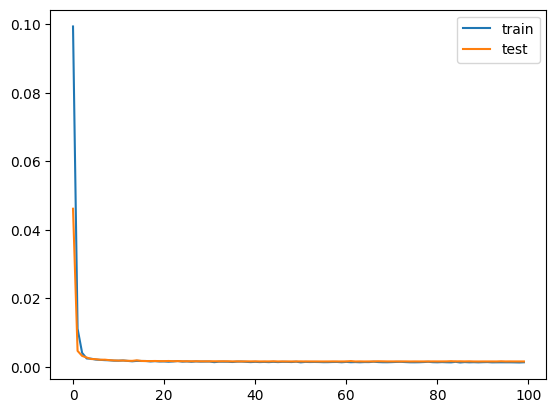

In [45]:
# MODEL update after Grid Search (units = 128,64 and verbose = 0)

# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=0, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

6/6 [==============================] - 1s 2ms/step
(165, 1) (165,)
(165,) (165,)
Test MAE: 0.020


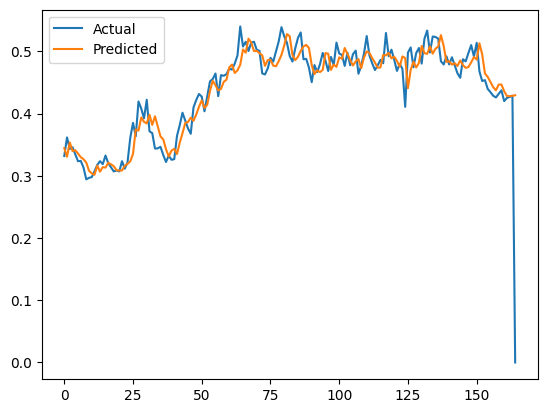

In [46]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [47]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.002
Test RMSE: 0.040


In [48]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.7322782597007298
